In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

df = pd.read_csv('C:/Users/devil/OneDrive/Documents/top tech/prejith/FINAL_USO.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [6]:

df = df.fillna(value={'Type 2':'Blank'})
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


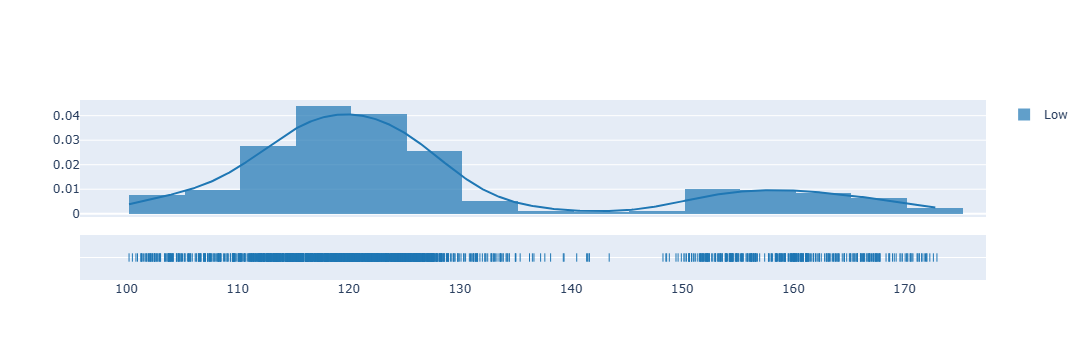

In [7]:
fig = ff.create_distplot([df.Low],['Low'],bin_size=5)
iplot(fig, filename='Basic Distplot')

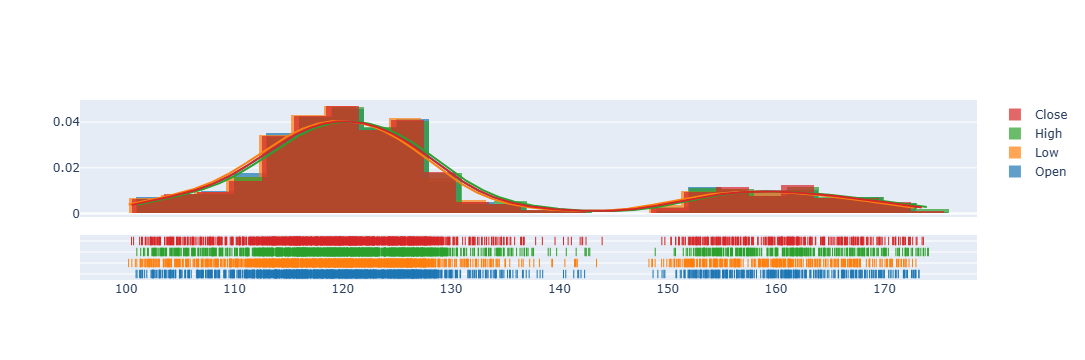

In [12]:
hist_data = [df['Open'], df['Low'], df['High'], df['Close']]
group_labels = ['Open', 'Low', 'High', 'Close']

fig = ff.create_distplot(hist_data, group_labels, bin_size=3)
iplot(fig)

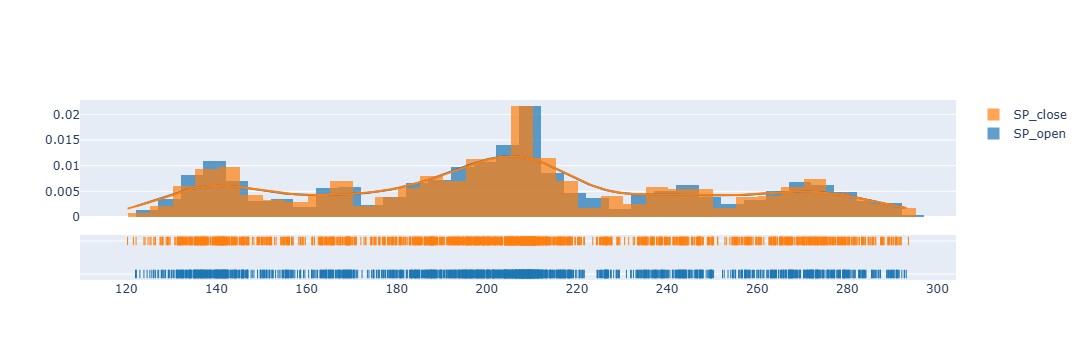

In [13]:
hist_data = [df['SP_open'],df['SP_close']]
group_labels = ['SP_open','SP_close']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Distplot of Sp_open & Sp_close')

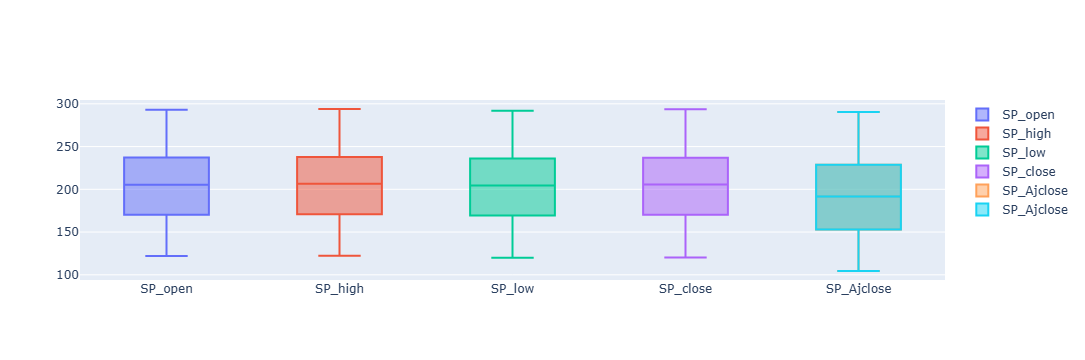

In [19]:
trace0 = go.Box(y=df["SP_open"],name="SP_open")
trace1 = go.Box(y=df["SP_high"],name="SP_high")
trace2 = go.Box(y=df["SP_low"],name="SP_low")
trace3 = go.Box(y=df["SP_close"],name="SP_close")
trace4 = go.Box(y=df["SP_Ajclose"],name="SP_Ajclose")
trace5 = go.Box(y=df["SP_Ajclose"],name="SP_Ajclose")
data = [trace0, trace1, trace2,trace3, trace4, trace5]
iplot(data)

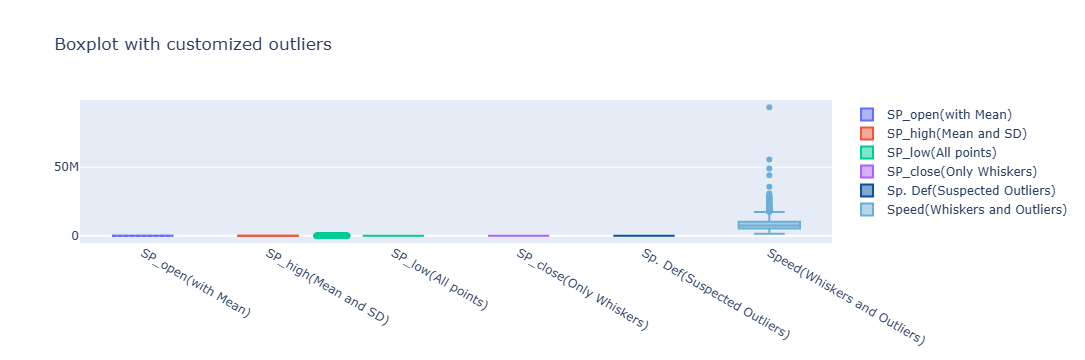

In [20]:
trace0 = go.Box(
    y=df["SP_open"],
    boxmean = True,
    name="SP_open(with Mean)"
)
trace1 = go.Box(
    y=df["SP_high"],
    boxmean = 'sd',
    name="SP_high(Mean and SD)"
)
trace2 = go.Box(
    y=df["SP_low"],
    jitter = 0.5,
    pointpos = -2,
    boxpoints = 'all',
    name = "SP_low(All points)"
)
trace3 = go.Box(
    y=df["SP_close"],
    boxpoints = False,
    name = "SP_close(Only Whiskers)"
)
trace4 = go.Box(
    y=df["SP_Ajclose"],
    boxpoints = 'suspectedoutliers',
    marker = dict(
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)'),
    name = "Sp. Def(Suspected Outliers)"
)
trace5 = go.Box(
    y=df["Volume"],
    boxpoints = 'outliers',
    line = dict(
        color = 'rgb(107,174,214)'),
    name = "Speed(Whiskers and Outliers)"
)

layout = go.Layout(
    title = "Boxplot with customized outliers"
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Customized Boxplot")